In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Cargar los datos
data = pd.read_excel('exports/ts_final.xlsx')
data['fecha'] = pd.to_datetime(data['ANO'].astype(str) + '-' + data['MES'].astype(str) + '-01')
data.set_index('fecha', inplace=True)
ts = data['ventas_electrico']



In [3]:
# Dividir en entrenamiento (hasta 2022) y prueba (2023)
train = ts[:'2022-12-01']
test = ts['2023-01-01':]

# Verificar estacionariedad con la prueba ADF
result = adfuller(train)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Diferenciar si no es estacionaria
if result[1] > 0.05:
    train_diff = train.diff().dropna()
else:
    train_diff = train



ADF Statistic: 0.7550879176667085
p-value: 0.9908755004199313


In [5]:
# Ajustar el modelo SARIMA
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Realizar predicciones
pred = model_fit.get_forecast(steps=len(test))
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()



C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [7]:
# Calcular métricas de evaluación
rmse = np.sqrt(mean_squared_error(test, pred_mean))
mape = mean_absolute_percentage_error(test, pred_mean)
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.4f}')


RMSE: 1752.99
MAPE: 0.3293


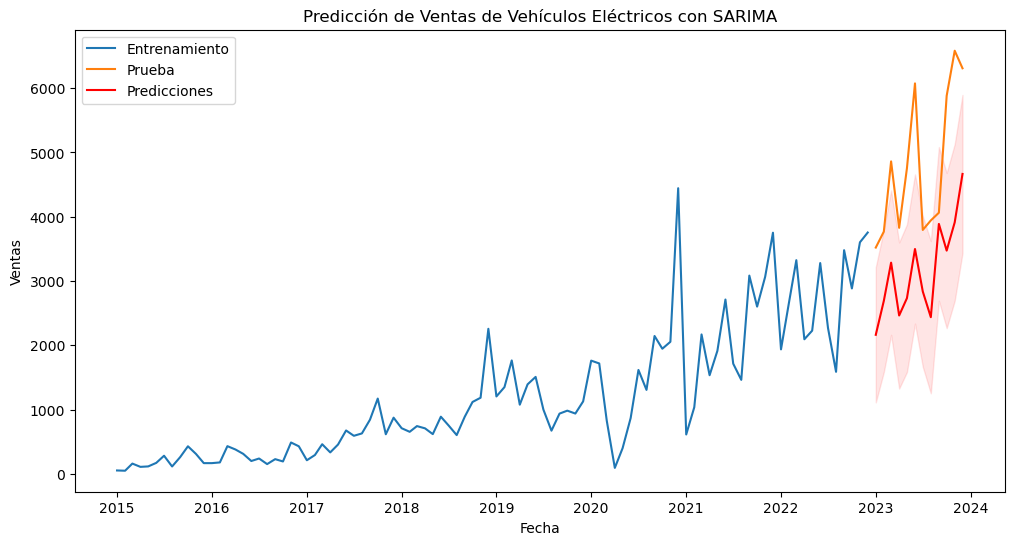

In [9]:
# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train, label='Entrenamiento')
plt.plot(test, label='Prueba')
plt.plot(pred_mean, label='Predicciones', color='red')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='red', alpha=0.1)
plt.title('Predicción de Ventas de Vehículos Eléctricos con SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()